## Sales Prediction 

In [ ]:
#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [ ]:
# There are no null values and duplicate values in the dataset

In [ ]:
# Drop unrelevant columns in the dataset

In [12]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [13]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Splitting the dataset

In [14]:
att=list(df.columns.drop(["Sales"]))
target=["Sales"]

## Removing Outliers

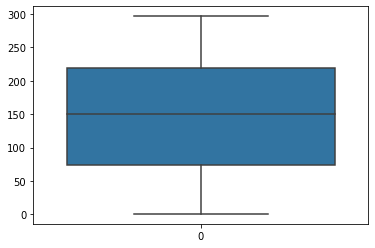

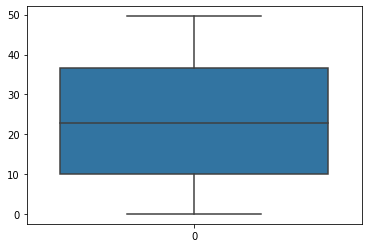

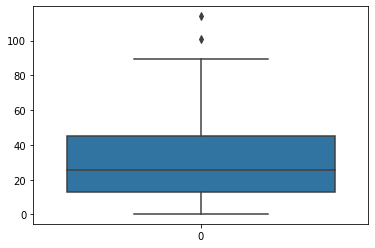

In [15]:
for i in att:
    sns.boxplot(data=df[i])
    plt.show()

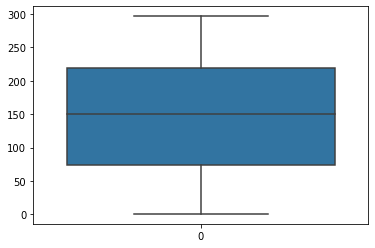

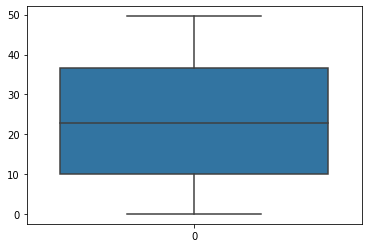

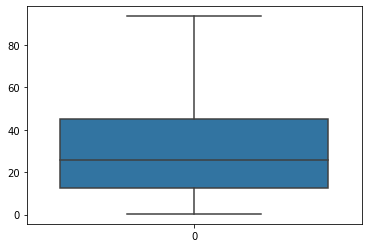

In [16]:
for i in att:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3-Q1
    low = Q1-1.5*IQR
    up = Q3+1.5*IQR
    
    for j in df[i]:
        if j<low:
            df=df.replace(j,low)
        if j>up:
            df=df.replace(j,up)
for i in att:
    sns.boxplot(data=df[i])
    plt.show()

## Data Visualization

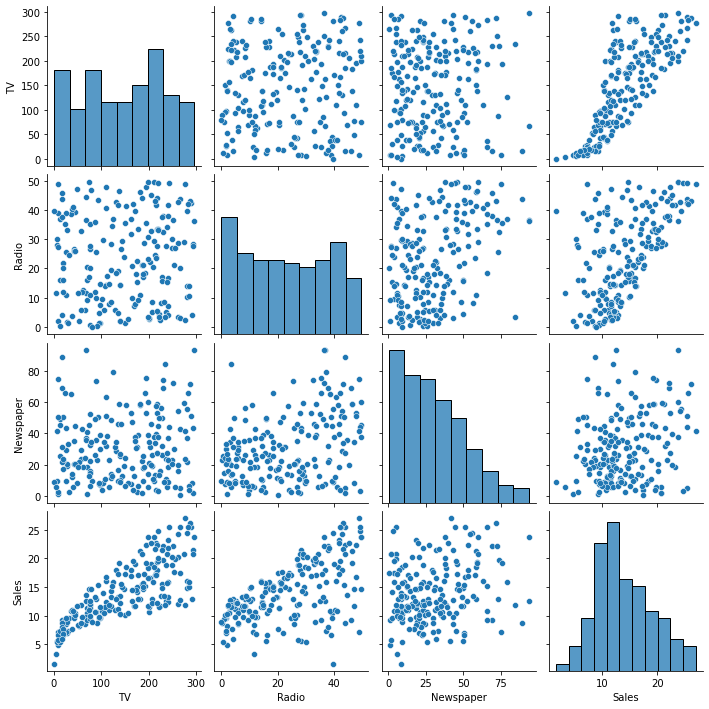

In [17]:
sns.pairplot(data=df)
plt.show()

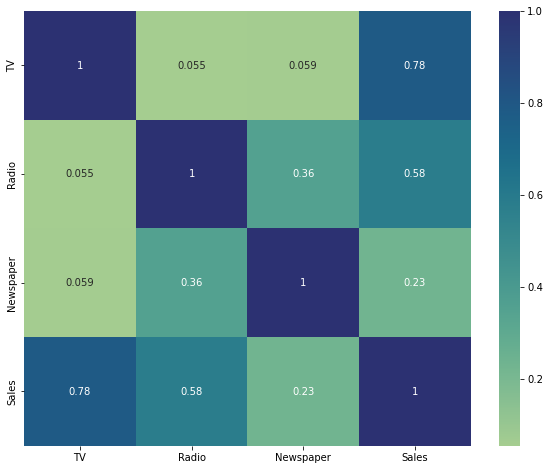

In [18]:
# Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True,cmap="crest")
plt.show()

In [ ]:
Correlation between each pair of attributes can be obtained using the heatmap.

Here,

TV and Sales are highly positively correlated, i.e. when one increases in value other also increases.

The correlation of TV with Newspaper and Radio is positive but very less.i.e, increase in TV doesnot significantly affects the Newspaper and Radio and viceversa

## Model Building

In [19]:
# Splitting the dataset

from sklearn.model_selection import train_test_split

X = df.drop(["Sales"],axis=1)
y = df["Sales"]

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [20]:
X_train.shape,y_train.shape

((160, 3), (160,))

In [21]:
X_test.shape,y_test.shape

((40, 3), (40,))

In [ ]:
# Building and fitting the model

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

## Evaluating the Model's Performance

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

print("Training Accuracy:",model.score(X_train,y_train))
print("")
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("")
print("R-squared:",r2_score(y_test,y_pred))

Training Accuracy: 0.895696714060078

Mean Squared Error: 3.171462185006356

R-squared: 0.8995215117097889


In [ ]:
Accuracy of the model is 89.57%. R-squared value is 0.899. This means that 88.9% of the variability observed in the target variable is explained by the regression model.